# US Craft Beers

KATE expects your code to define variables with specific names that correspond to certain things we are interested in.

KATE will run your notebook from top to bottom and check the latest value of those variables, so make sure you don't overwrite them.

* Remember to uncomment the line assigning the variable to your answer and don't change the variable or function names.
* Use copies of the original or previous DataFrames to make sure you do not overwrite them by mistake.

You will find instructions below about how to define each variable.

Once you're happy with your code, upload your notebook to KATE to check your feedback.

# ☑️ How to complete and submit
Each exercise will look something like this:

```python
example_query = """
SELECT *
FROM sample
"""
#example_result = pd.read_sql(example_query, conn)
#example_result
```

In each exercise you will need to define a query variable by writing the SQL code that you think will solve the problem. SQL code should be enclosed in three double or single quotes.

Once you have your query, uncomment the last two code lines, this will execute it and load the resulting data into a dataframe.

Nothing else needs to be changed in the last code lines besides uncommenting it.

After running this you will be free to inspect the result produced to see whether it's what you'd expect as the result. KATE will look for variables with the names defined in this notebook, so it is important not to rename the variables defined in this notebook.

Once you've completed the exercises upload this notebook to **KATE** to get feedback. You can also upload the notebook when you only have parts of it completed - if you do so, make sure you do not uncomment the `pd.read_sql` lines for which you don't have a query yet.

Refer to the instructions on **KATE** for more details on the dataset.

# ☑️ Setting up the database connection

Run the following code cell to import `pandas` and `sqlite3` libraries and create the connection to the `beers.db` database.

**Do not change this code!** The `conn` variable will be used throughout the notebook to query the database.

In [1]:
import pandas as pd
import sqlite3

conn = sqlite3.connect("data/beers.db")

# ☑️ Introduction to the Craft Beers dataset 

In this assignment we have access to a SQL database containing information about craft beers in the USA.

You can read about how the data was sourced [here](https://www.jeannicholashould.com/python-web-scraping-tutorial-for-craft-beers.html).

Run the following code cell to show all the tables in the `beers.db` database:

In [2]:
query = """
SELECT name 
FROM sqlite_master 
WHERE type='table';
"""
df = pd.read_sql_query(query, conn)
df

,name
0,beers
1,breweries


Referencing these tables and their respective columns will be useful in answering the following questions. Run the following code to show column names and data types within each table:

In [3]:
for table in ['beers','breweries']:
    
    query = f"""
    PRAGMA table_info({table});
    """
    df = pd.read_sql_query(query, conn)
    print(df[['name','type']])
    print('='*40)

         name     type
0         abv     REAL
1         ibu     REAL
2          id  INTEGER
3        name     TEXT
4       style     TEXT
5  brewery_id  INTEGER
6      ounces     REAL
         name     type
0  brewery_id  INTEGER
1        name     TEXT
2        city     TEXT
3       state     TEXT


In [4]:
#five_rows_beers_query = """

#SELECT abv, ibu, id, name, style,brewery_id,ounces 
#FROM beers
#LIMIT 5;"""
#five_rows_beers_result = pd.read_sql_query(five_rows_beers_query, conn)
#five_rows_beers_result


In [5]:
#add your code below
#five_rows_breweries_query = """
#SELECT  brewery_id, name, city, state
#FROM breweries;"""
#five_rows_breweries_result = pd.read_sql_query(five_rows_breweries_query, conn)
#five_rows_breweries_result

# ☑️ Queries

**Q1. Let's start by inspecting the database's metadata. To do this, load all the schemas from the `sqlite_master` table. The columns we want are `type`, `name`, `tbl_name`, `rootpage`, and `sql`.**

See below code syntax for some guidance:
```SQL
SELECT column_names
FROM sqlite_master;
```

In [6]:
#add your code below
metadata_query = """
SELECT type, name, tbl_name, rootpage, sql
FROM sqlite_master;
"""
metadata_result = pd.read_sql_query(metadata_query, conn)
metadata_result


,type,name,tbl_name,rootpage,sql
0,table,beers,beers,2,"CREATE TABLE ""beers"" (\n""abv"" REAL,\n ""ibu"" R..."
1,table,breweries,breweries,40,"CREATE TABLE ""breweries"" (\n""brewery_id"" INTEG..."


**Q2. Now that we know more about the structure of the database, let's retrieve some information. To get started, retrieve the first 5 rows of the `beers` table. We want the `abv`, `ibu`, `name`, and `style` columns.**

See below code syntax for some guidance:
```SQL
SELECT column_names
FROM beers
LIMIT <number_of_rows>;
```

In [7]:
#add your code below
five_rows_beers_query = """

SELECT abv, ibu, name, style
FROM beers
LIMIT 5;

"""
five_rows_beers_result = pd.read_sql_query(five_rows_beers_query, conn)
five_rows_beers_result



,abv,ibu,name,style
0,0.050,None,Pub Beer,American Pale Lager
1,0.066,None,Devil's Cup,American Pale Ale (APA)
2,0.071,None,Rise of the Phoenix,American IPA
3,0.090,None,Sinister,American Double / Imperial IPA
4,0.075,None,Sex and Candy,American IPA


**Q3. Similarly, query the first 5 rows of the `breweries` table. We want the `brewery_id`, `name`, `city`, and `state` columns.**

See below code syntax for some guidance:
```SQL
SELECT column_names
FROM beers
LIMIT <number_of_rows>;
```

In [8]:
#add your code below
five_rows_breweries_query = """
SELECT brewery_id, name, city, state
FROM breweries;

"""
five_rows_breweries_result = pd.read_sql_query(five_rows_breweries_query, conn)
five_rows_breweries_result

,brewery_id,name,city,state
0,0,NorthGate Brewing,Minneapolis,MN
1,1,Against the Grain Brewery,Louisville,KY
2,2,Jack's Abby Craft Lagers,Framingham,MA
3,3,Mike Hess Brewing Company,San Diego,CA
4,4,Fort Point Beer Company,San Francisco,CA
...,...,...,...,...
553,553,Covington Brewhouse,Covington,LA
554,554,Dave's Brewfarm,Wilson,WI
555,555,Ukiah Brewing Company,Ukiah,CA
556,556,Butternuts Beer and Ale,Garrattsville,NY


**Q4. Query the `beers` table to find out the number of rows. Use an alias so the name of the column returned is `row_count`.**

- Make use of SQL `COUNT(*)` function to calculate total number of rows, and assign the alias `row_count` to the result using the `AS` keyword

See below code syntax for some guidance:
```SQL
SELECT COUNT(*) AS <alias>
FROM beers;
```

In [9]:
#add your code below
beers_total_rows_query ="""
SELECT COUNT(*) AS row_count
FROM beers;

"""
beers_total_rows_result = pd.read_sql_query(beers_total_rows_query, conn)
beers_total_rows_result



,row_count
0,2410


**Q5. Query the `beers` table to find out how many distinct styles are present. Use an alias so the name of the column returned is `distinct_styles`.**


- Use `DISTINCT()` function to extract unique beer styles and use `COUNT()` function to calculate the number of unique values in `style` column

See below code syntax for some guidance:
```SQL
SELECT COUNT(DISTINCT(column_name)) AS <alias>
FROM beers;
```

In [10]:
#add your code below
distinct_styles_query = """
SELECT COUNT(DISTINCT(style)) AS distinct_styles
FROM beers;

"""
distinct_styles_result = pd.read_sql_query(distinct_styles_query, conn)
distinct_styles_result



,distinct_styles
0,99


**Q6. Let's now find out about alcoholic content. Query the `beers` table to find the minimum, average, and maximum alcohol content (`abv`). The column names should be `min`, `avg`, and `max`.**

- Use `MIN()`, `AVG()` and `MAX()` functions to calculate the minimum, average, and maximum alcohol content in `abv` column
- Consider using SQL `AS` keyword to assign the aliases `min`, `avg`, and `max`

See below code syntax for some guidance:
```SQL
SELECT MIN(column_name) AS <alias>, AVG(column_name) AS <alias>, MAX(column_name) AS <alias>
FROM beers;
```

In [11]:
#add your code below
alcoholic_content_query = """
SELECT MIN(abv) AS min , AVG(abv) AS avg, MAX (abv) AS max
FROM beers;

"""
alcoholic_content_result = pd.read_sql_query(alcoholic_content_query, conn)
alcoholic_content_result



,min,avg,max
0,0.001,0.059773,0.128


**Q7. Query the `beers` table to get all the `abv` values.**

We can then use this data to plot the distribution of the `abv`.


See below code syntax for some guidance:
```SQL
SELECT column_name
FROM beers;
```

In [12]:
#add your code below
abv_distribution_query = """
SELECT abv
FROM beers;

"""
abv_distribution_result = pd.read_sql_query(abv_distribution_query, conn)
abv_distribution_result



,abv
0,0.050
1,0.066
2,0.071
3,0.090
4,0.075
...,...
2405,0.067
2406,0.052
2407,0.055
2408,0.055


Once you have retrieved the `abv_distribution_result`, uncomment and execute the cell below to generate a histogram:

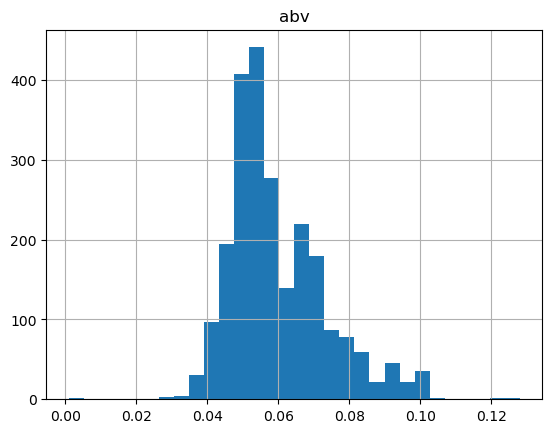

In [13]:
abv_hist = abv_distribution_result.hist(bins=30);

**Q8. Query the distinct types of IPA styles in the `beers` table.**

- Use `DISTINCT()` function to extract unique IPA styles from `style` column and assign the alias `ipa_styles`

- To specify the criteria, you may want to use `LIKE` with the `WHERE` keyword. Extract all IPA styles from `style` column if it has the word `"IPA"` in its name

- Sort the data in alphabetical order, this could be achieved by using `ORDER BY` keyword with `ASC`


See below code syntax for some guidance:
```SQL
SELECT DISTINCT(column_name) AS <alias>
FROM beers
WHERE <condition>
ORDER BY <column_name> ASC;
```

In [14]:
#add your code below
ipa_styles_query ="""
SELECT DISTINCT(style) AS ipa_styles
FROM beers
WHERE ipa_styles LIKE '%IPA%'
ORDER BY ipa_styles ASC;

"""
ipa_styles_result = pd.read_sql_query(ipa_styles_query, conn)
ipa_styles_result



,ipa_styles
0,American Double / Imperial IPA
1,American IPA
2,American White IPA
3,Belgian IPA
4,English India Pale Ale (IPA)


**Q9. The `ibu` is an abbreviation for the International Bitterness Units scale; a measurement of a beer's bitterness. Calculate the average bitterness of lager beers and pale ale beers. Consider a beer style lager if its style contains `"lager"`, and consider a beer style pale ale if its style contains `"IPA"`, `"APA"` or `"Pale Ale"`.**


- Use `AVG()` functions to calculate the average ibu content from the `ibu` column

- To specify the criteria, you may want to use `LIKE` with the `WHERE` keyword, extract all styles from `style` column

See below code syntax for some guidance:

```SQL
SELECT AVG(column_name)
FROM beers
WHERE <condition>;
```

In [15]:
#add your code below

ale_bitterness_query = """
SELECT AVG(ibu), style
FROM beers
WHERE style LIKE '%lager%';
"""
ale_bitterness_result = pd.read_sql_query(ale_bitterness_query, conn)
print(ale_bitterness_result)

lager_bitterness_query = """
SELECT AVG(ibu), style
FROM beers
WHERE style LIKE '%IPA%' OR style LIKE' %APA%' OR style LIKE '%Pale Ale%';
"""
lager_bitterness_result = pd.read_sql_query(lager_bitterness_query, conn)
print(lager_bitterness_result)




    AVG(ibu)                style
0  22.863636  American Pale Lager
    AVG(ibu)                    style
0  63.353571  American Pale Ale (APA)


**Q10. Calculate how many beers there are of each `style` in the `beers` table.** 


- Your result should have two columns: `style` (the style name) and `number` (the number of beers of that style).

- Order the results by the `number` of beers of each style in _descending_ order. 

- Limit your result to the first `10` styles.

In [16]:
#add your code below
style_count_query = """
SELECT DISTINCT(style) AS style, COUNT(DISTINCT(id)) AS number
FROM beers
GROUP BY style
ORDER BY number DESC
LIMIT 10;


"""
style_count_result = pd.read_sql_query(style_count_query, conn)
style_count_result



,style,number
0,American IPA,424
1,American Pale Ale (APA),245
2,American Amber / Red Ale,133
3,American Blonde Ale,108
4,American Double / Imperial IPA,105
5,American Pale Wheat Ale,97
6,American Brown Ale,70
7,American Porter,68
8,Saison / Farmhouse Ale,52
9,Witbier,51


**Q11. Query the `beers` and `breweries` tables to list all the breweries and beers that can be found in San Francisco.**

- An `INNER JOIN` can be used to merge the `beers` and `breweries` tables based on the common field `brewery_id`: `beers.brewery_id = breweries.brewery_id`

- Your result should contain two columns: `brewery` and `beer`: Use `AS` keyword to assign the alias `brewery` to `breweries.name` column and alias `beer` to `beers.name` column

- To specify the criteria, use the `WHERE` keyword, consider filtering by `breweries.city = 'San Francisco'`

- The result should be ordered alphabetically by brewery name then beer name, this could be achieved by using `ORDER BY` keyword with `ASC`


See below code syntax for some guidance:
```SQL
SELECT <column_names>
FROM <table1>
INNER JOIN <table2>
ON table1.column_name = table2.column_name
WHERE <condition>
ORDER BY <column_name1> ASC, <column_name1> ASC;
```

In [17]:
#add your code below
beers_and_brewery_query ="""

SELECT breweries.name AS brewery, beers.name AS beer
FROM beers

INNER JOIN breweries
ON beers.brewery_id = breweries.brewery_id
WHERE breweries.city = 'San Francisco'
ORDER BY brewery ASC, beer ASC;

"""
beers_and_brewery_result = pd.read_sql_query(beers_and_brewery_query, conn)
beers_and_brewery_result



,brewery,beer
0,21st Amendment Brewery,21st Amendment IPA (2006)
1,21st Amendment Brewery,21st Amendment Watermelon Wheat Beer (2006)
2,21st Amendment Brewery,Back in Black
3,21st Amendment Brewery,Bitter American
4,21st Amendment Brewery,Bitter American (2011)
5,21st Amendment Brewery,Brew Free! or Die IPA
6,21st Amendment Brewery,Brew Free! or Die IPA (2008)
7,21st Amendment Brewery,Brew Free! or Die IPA (2009)
8,21st Amendment Brewery,Fireside Chat
9,21st Amendment Brewery,Fireside Chat (2010)


**Q12. Query the `beers` and `breweries` tables to find the largest breweries by the number of beers produced.**

- Your result should have two columns, `name` and `number of beers`, and should be ordered from largest to smallest.

- If `number of beers` is the same, it should be ordered alphabetically.

- Limit your result to the top `10` breweries.

_Note: if a column name has spaces, you can wrap it in backticks(\` \`), quotes(" "), or square brackets(\[ \])._

_E.g. `SELECT [long column name] FROM table`_

_**Hint**:  some breweries have the same name, hence you cannot rely on unique names. ID numbers are often used unique identifiers for this reason._

Please note you have been provided with the code for this question to carry out the necessary data manipulation and reporting work. Simply run the code cell to produce the desired results.

In [18]:
largest_breweries_query = """
SELECT breweries.name AS name, COUNT(*) AS "number of beers", breweries.brewery_id

FROM beers
INNER JOIN breweries
ON beers.brewery_id = breweries.brewery_id
GROUP BY breweries.brewery_id, breweries.name 
ORDER BY "number of beers" DESC, name ASC
LIMIT 10;
"""
largest_breweries_result = pd.read_sql_query(largest_breweries_query, conn)
largest_breweries_result

,name,number of beers,brewery_id
0,Brewery Vivant,62,10
1,Sun King Brewing Company,38,25
2,Oskar Blues Brewery,33,166
3,Cigar City Brewing Company,25,141
4,Sixpoint Craft Ales,24,46
5,Hopworks Urban Brewery,23,80
6,Stevens Point Brewery,22,131
7,21st Amendment Brewery,20,368
8,Great Crescent Brewery,20,165
9,Bonfire Brewing Company,19,107


**Q13. Query the `breweries` and `beers` tables to identify the top 10 US states with regard to the number of _breweries_.**


- Your result should have three columns: `state`, `breweries` (the number of breweries), and `beers` (the number of `beers`).

- Make sure you order your result by number of breweries to get the top 10 - if there is a draw order alphabetically by state


Please note you have been provided with the code for this question to carry out the necessary data manipulation and reporting work. Simply run the code cell to produce the desired results.

In [19]:
top_10_states_query = """
SELECT
    brew.state AS state
    , COUNT(DISTINCT(brew.brewery_id)) AS breweries
    , COUNT(*) AS beers
FROM beers
JOIN breweries AS brew
ON beers.brewery_id = brew.brewery_id
GROUP BY state
ORDER BY breweries DESC, state ASC
LIMIT 10
"""
top_10_states_result = pd.read_sql_query(top_10_states_query, conn)
top_10_states_result

# Note: this can also be done using a sub-query
# which is more flexible if you needed something more custom
# top_10_states_query = """
#     SELECT state, count(*) AS "breweries", sum(b.beers) "beers" FROM breweries
#     JOIN 
#         (SELECT brewery_id, count(*) AS beers
#          FROM beers
#          GROUP BY brewery_id) b 
#     ON b.brewery_id = breweries.brewery_id
#     GROUP BY state
#     ORDER BY breweries DESC, state ASC
#     LIMIT 10
# """

,state,breweries,beers
0,CO,47,265
1,CA,39,183
2,MI,32,162
3,OR,29,125
4,TX,28,130
5,PA,25,100
6,MA,23,82
7,WA,23,68
8,IN,22,139
9,WI,20,87


In [22]:
#top_10_states_query = """
#SELECT state, COUNT(*) AS breweries, SUM(b.beers) beers 
#FROM breweries
#JOIN 
 #   (SELECT brewery_id, COUNT(*) AS beers
  #  FROM beers
   # GROUP BY brewery_id) b
#ON b.brewery_id = breweries.brewery_id
#GROUP BY state
#ORDER BY breweries DESC, state ASC
#LIMIT 10
 #"""
#top_10_states_result = pd.read_sql_query(top_10_states_query, conn)
#top_10_states_result

In [21]:
#top_10_states_query = """
#SELECT brewery_id, COUNT(*) AS beers
    #FROM beers
    #GROUP BY brewery_id;     """
#top_10_states_result = pd.read_sql_query(top_10_states_query, conn)
#top_10_states_result